In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [153]:
df = pd.read_csv('C:/Users/rishu/Documents/GitHub/bearing_rul_predict/data/original_data/femto_dataset/Bearing1_1_new/acc/acc.csv')

In [154]:
df

,hour,min,seg,h,v
0,9,39,39,0.552,-0.146
1,9,39,39,0.501,-0.480
2,9,39,39,0.138,0.435
3,9,39,39,-0.423,0.240
4,9,39,39,-0.802,0.020
...,...,...,...,...,...
7175675,17,26,39,-3.353,2.129
7175676,17,26,39,-2.868,-2.299
7175677,17,26,39,-5.507,-1.844
7175678,17,26,39,-3.578,2.146


In [155]:
df['time'] = df['hour'].astype(str) + ':' + df['min'].astype(str) + ':' + df['seg'].astype(str)

In [156]:
df

,hour,min,seg,h,v,time
0,9,39,39,0.552,-0.146,9:39:39
1,9,39,39,0.501,-0.480,9:39:39
2,9,39,39,0.138,0.435,9:39:39
3,9,39,39,-0.423,0.240,9:39:39
4,9,39,39,-0.802,0.020,9:39:39
...,...,...,...,...,...,...
7175675,17,26,39,-3.353,2.129,17:26:39
7175676,17,26,39,-2.868,-2.299,17:26:39
7175677,17,26,39,-5.507,-1.844,17:26:39
7175678,17,26,39,-3.578,2.146,17:26:39


In [157]:
df =  df.drop(['hour','min','seg','h'],axis=1)

In [158]:
df

,v,time
0,-0.146,9:39:39
1,-0.480,9:39:39
2,0.435,9:39:39
3,0.240,9:39:39
4,0.020,9:39:39
...,...,...
7175675,2.129,17:26:39
7175676,-2.299,17:26:39
7175677,-1.844,17:26:39
7175678,2.146,17:26:39


In [137]:
df.time = pd.to_datetime(df.time, errors='coerce')

In [138]:
df

,v,time
0,-0.146,2021-07-28 09:39:39
1,-0.480,2021-07-28 09:39:39
2,0.435,2021-07-28 09:39:39
3,0.240,2021-07-28 09:39:39
4,0.020,2021-07-28 09:39:39
...,...,...
7175675,2.129,2021-07-28 17:26:39
7175676,-2.299,2021-07-28 17:26:39
7175677,-1.844,2021-07-28 17:26:39
7175678,2.146,2021-07-28 17:26:39


In [139]:
df=df.set_index('time')

In [140]:
df

,v
time,
2021-07-28 09:39:39,-0.146
2021-07-28 09:39:39,-0.480
2021-07-28 09:39:39,0.435
2021-07-28 09:39:39,0.240
2021-07-28 09:39:39,0.020
...,...
2021-07-28 17:26:39,2.129
2021-07-28 17:26:39,-2.299
2021-07-28 17:26:39,-1.844


In [141]:
data = df.copy()
y = data
y

,v
time,
2021-07-28 09:39:39,-0.146
2021-07-28 09:39:39,-0.480
2021-07-28 09:39:39,0.435
2021-07-28 09:39:39,0.240
2021-07-28 09:39:39,0.020
...,...
2021-07-28 17:26:39,2.129
2021-07-28 17:26:39,-2.299
2021-07-28 17:26:39,-1.844


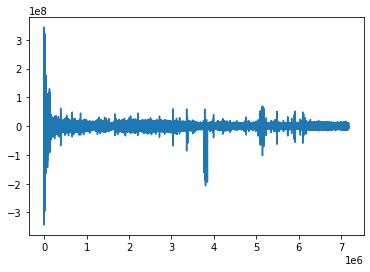

In [125]:
plt.plot(figsize=(15, 6))
plt.plot(np.fft.fft2(y.v, s=None, axes=(0,  0), norm=None))

In [159]:
x =  np.fft.fft2(y.v, s=None, axes=(0,  0), norm=None)

In [160]:
x

array([-1047649.28      -3.72529030e-09j,
        3372569.6       -2.82310419e-09j,
       15399009.27999999+1.38354039e-09j, ...,
        1722163.19999999+3.79699561e-09j,
        3121420.8       +2.66286548e-10j,
       -3444326.39999999-6.45049147e-09j])

In [162]:
dataset = pd.DataFrame({'fft': x })

In [163]:
new_df=pd.concat([df,dataset],axis=1)
new_df

,v,time,fft
0,-0.146,9:39:39,-1.047649e+06-3.725290e-09j
1,-0.480,9:39:39,3.372570e+06-2.823104e-09j
2,0.435,9:39:39,1.539901e+07+1.383540e-09j
3,0.240,9:39:39,-1.323195e+07+1.436064e-09j
4,0.020,9:39:39,-1.649689e+07+1.473438e-09j
...,...,...,...
7175675,2.129,17:26:39,8.036762e+05-4.285763e-09j
7175676,-2.299,17:26:39,1.435136e+05+3.163804e-09j
7175677,-1.844,17:26:39,1.722163e+06+3.796996e-09j
7175678,2.146,17:26:39,3.121421e+06+2.662865e-10j


In [164]:
new_df =  new_df.drop(['v'],axis=1)
new_df

,time,fft
0,9:39:39,-1.047649e+06-3.725290e-09j
1,9:39:39,3.372570e+06-2.823104e-09j
2,9:39:39,1.539901e+07+1.383540e-09j
3,9:39:39,-1.323195e+07+1.436064e-09j
4,9:39:39,-1.649689e+07+1.473438e-09j
...,...,...
7175675,17:26:39,8.036762e+05-4.285763e-09j
7175676,17:26:39,1.435136e+05+3.163804e-09j
7175677,17:26:39,1.722163e+06+3.796996e-09j
7175678,17:26:39,3.121421e+06+2.662865e-10j


In [165]:
new_df.to_csv("fft.csv",index=False)

In [126]:
y = y['v'].resample('S').mean()
y = y.fillna(y.bfill())
y

time
2021-07-28 09:38:46   -0.012149
2021-07-28 09:38:47   -0.001881
2021-07-28 09:38:48   -0.001881
2021-07-28 09:38:49   -0.001881
2021-07-28 09:38:50   -0.001881
                         ...   
2021-07-28 17:26:35   -0.507520
2021-07-28 17:26:36   -0.507520
2021-07-28 17:26:37   -0.507520
2021-07-28 17:26:38   -0.507520
2021-07-28 17:26:39   -0.507520
Name: v, Length: 28074, dtype: float64

In [127]:
y.to_csv("time_series_values.csv")

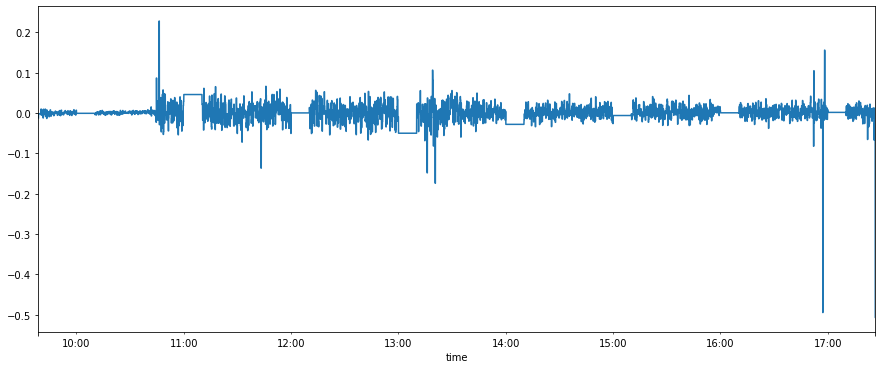

In [110]:
y.plot(figsize=(15, 6))
plt.show()

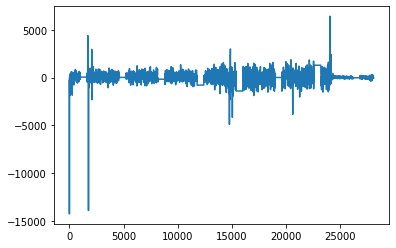

In [112]:
plt.plot(figsize=(15, 6))
plt.plot(np.fft.fft2(y, s=None, axes=(0,  0), norm=None))